# Beykoz University - Computer Engineering
#  Social Media Sentiment Analysis - Capstone Project
#  Leyla Abdullayeva - 1904010038 with Random Forest

## What is Sentiment Analysis?
Sentiment Analysis is the process of ‘computationally’ determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.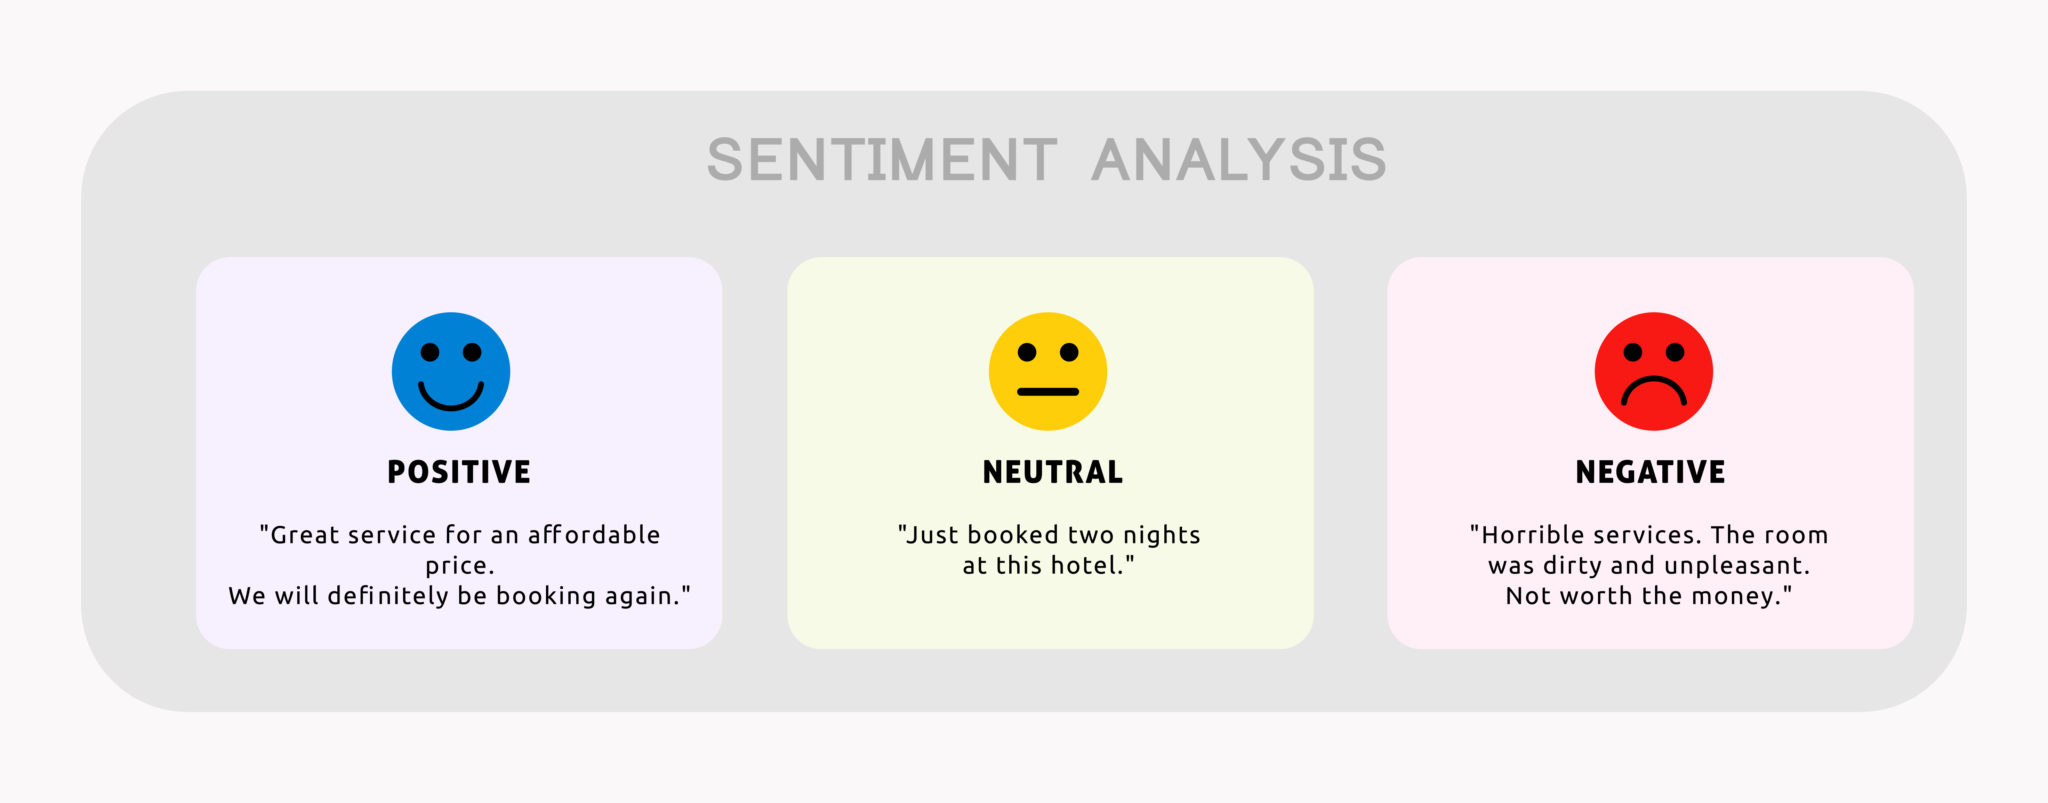

#Used Algotihms#

## Random Forest Classifier
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.
- [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- It is supervised learning algorithm.

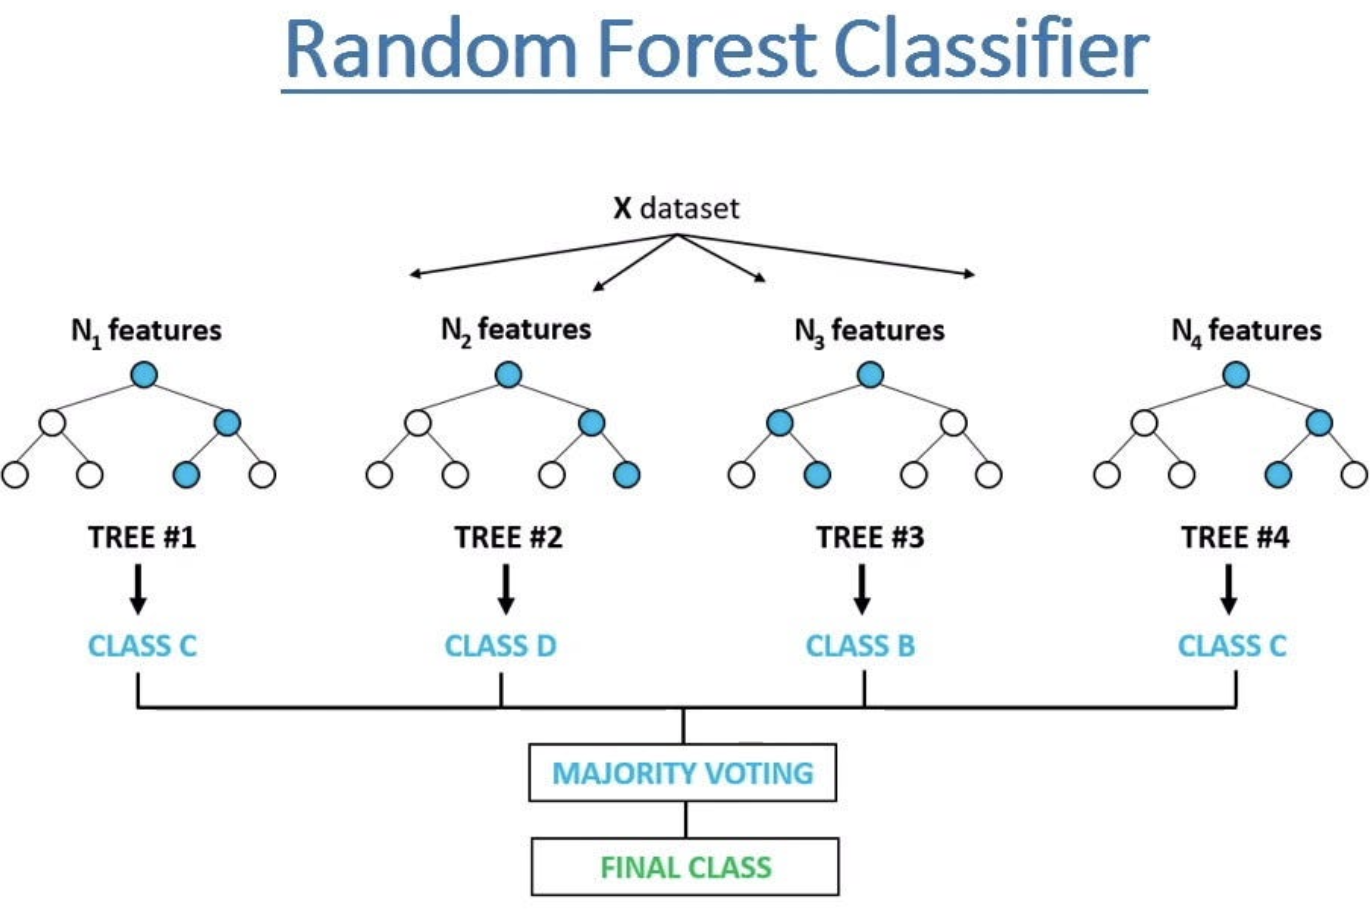

### Pros of Random Forest Classifier
- It is very accurate algorithm.
- It is robust to outliers and nonlinear data.
- It is highly scalable to any dataset size. It can handle large datasets.
- It can handle missing values efficiently.
- It can be used for feature selection.

### Cons of Random Forest Classifier
- It can be computationally expensive when you have a lot of trees.


### Dataset
- https://github.com/laxmimerit/All-CSV-ML-Data-Files-Download/blob/master/twitter_sentiment.csv
- https://github.com/laxmimerit/preprocess_kgptalkie

## 1. Algorithm - Random Forest Classifier

In [ ]:
! pip install spacy
! python -m spacy download en_core_web_sm
! pip install beautifulsoup4
! pip install textblob


2024-01-22 19:51:24.772583: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-22 19:51:24.772665: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-22 19:51:24.775393: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-22 19:51:24.789017: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-22 19:51:26.632800: W tensorflow/compiler/tf2

In [ ]:
# load the dataset -> feature extraction -> data visualization -> data cleaning -> train test split
# -> model building -> model training -> model evaluation -> model saving -> streamlit application deploy

# disable warning
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv', header=None, index_col=[0])
df = df[[2,3]].reset_index(drop=True)
df.columns = ['sentiment', 'text']
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df.sample(10)

,sentiment,text
5603,Positive,it been selling for $144 yesterday and its abo...
57630,Neutral,Completely stunned and saddened to learn of @i...
70563,Negative,had to jump underground to get a double kill..
51282,Neutral,I’m selling my Xbox One X Special Edition Red ...
28634,Positive,Love the new upgrade on the Triple take (:
17301,Positive,the ps5 got worse? alr rip xbox
61845,Negative,I don't enjoy either of the gta games.. I just...
45427,Negative,damn yet Verizon Wireless leaves me open smh.
58883,Neutral,<unk>
66571,Neutral,"China shuts factories of Foxconn, Johnson & Jo..."


In [ ]:
df.info()

df.isnull().sum()

df.dropna(inplace=True)

df = df[df['text'].apply(len)>1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [ ]:
df['sentiment'].value_counts()

Negative      22530
Positive      20844
Neutral       18285
Irrelevant    12988
Name: sentiment, dtype: int64

In [ ]:
sum (df['text'].apply(len)>5), sum (df['text'].apply(len)<=5)

(72883, 1764)

In [ ]:
df.sample(10)

,sentiment,text
73068,Positive,"Well, this is impressive"
27890,Positive,It's very funny when the stars of the arc actu...
1809,Neutral,"Miss Moxxi.. Paper test went extremely well, I..."
62554,Negative,Only I roll e play yo think we're tired where ...
28511,Neutral,haha everytime for the unexpected even in the ...
25832,Positive,"When I say y'all, I've never been so excited a..."
72908,Negative,"so like, is there even a single game where nvi..."
72740,Positive,@ Afvision after the new 30GB patch COD MW bre...
48619,Neutral,Watch out for the drip. Thigh out baby!!
10673,Irrelevant,Funny how Xbox seems S to be inferior than Xbo...


In [ ]:
df['sentiment'].value_counts()

Negative      22530
Positive      20844
Neutral       18285
Irrelevant    12988
Name: sentiment, dtype: int64

Preprocessing preprocess_kgptalkie

In [ ]:
!pip install git+https://github.com/kgptalkie/preprocess_kgptalkie.git


  Cloning https://github.com/kgptalkie/preprocess_kgptalkie.git to /tmp/pip-req-build-ca9e18es
  Running command git clone --filter=blob:none --quiet https://github.com/kgptalkie/preprocess_kgptalkie.git /tmp/pip-req-build-ca9e18es
  Resolved https://github.com/kgptalkie/preprocess_kgptalkie.git to commit 9884ba65fc3068d5ca4d67c15a84c432a41f03cb
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.0.3-py3-none-any.whl size=3866 sha256=5dd3bb4e71dc093e4070ed6eb0b6fad4913473af24f6af795be324fce74f0e86
  Stored in directory: /tmp/pip-ephem-wheel-cache-m9aaf4en/wheels/db/0f/df/90d344645cd614859ad0606b80795f0b8e92c6a2d09ebc1762
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as ps

df.columns

Index(['sentiment', 'text'], dtype='object')

In [ ]:
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
import nltk
nltk.download('punkt')  # Download necessary data files

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /Users/leyviya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
num_cols = df.select_dtypes(include= 'number').columns

for index, col in enumerate(num_cols):
    plt.subplot (2,4, index+1)
    sns.kdeplot (data=df, x=col , hue="sentiment", fill = True)

    plt.tight_layout()
    plt.show()

<Figure size 1200x600 with 0 Axes>

In [ ]:
df.select_dtypes(include='number')

""
0
1
2
3
4
...
75677
75678
75679
75680


In [ ]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# plot 2x4 grid histogram for each numerical feature
plt.figure(figsize=(20,10))

num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.subplot(2,4, num_cols.get_loc(col)+1)

    # use sentiment as hue to see the distribution of each numerical feature
    # sns.distplot(df[col], label=col, color='red')
    # sns.histplot(x=col, hue='sentiment', data=df, color='green', bins=100, kde=True)
    sns.kdeplot(data=df, x=col, hue='sentiment', fill=True)

    plt.tight_layout()
    plt.show()

<Figure size 2000x1000 with 0 Axes>

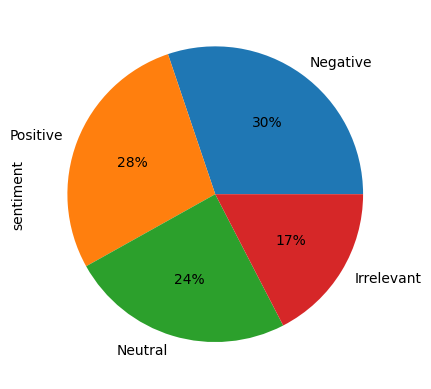

In [ ]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# word cloud
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

In [ ]:
 ! pip install wordcloud

from wordcloud import WordCloud, STOPWORDS

stopwords = set (STOPWORDS)

In [ ]:
stopwords

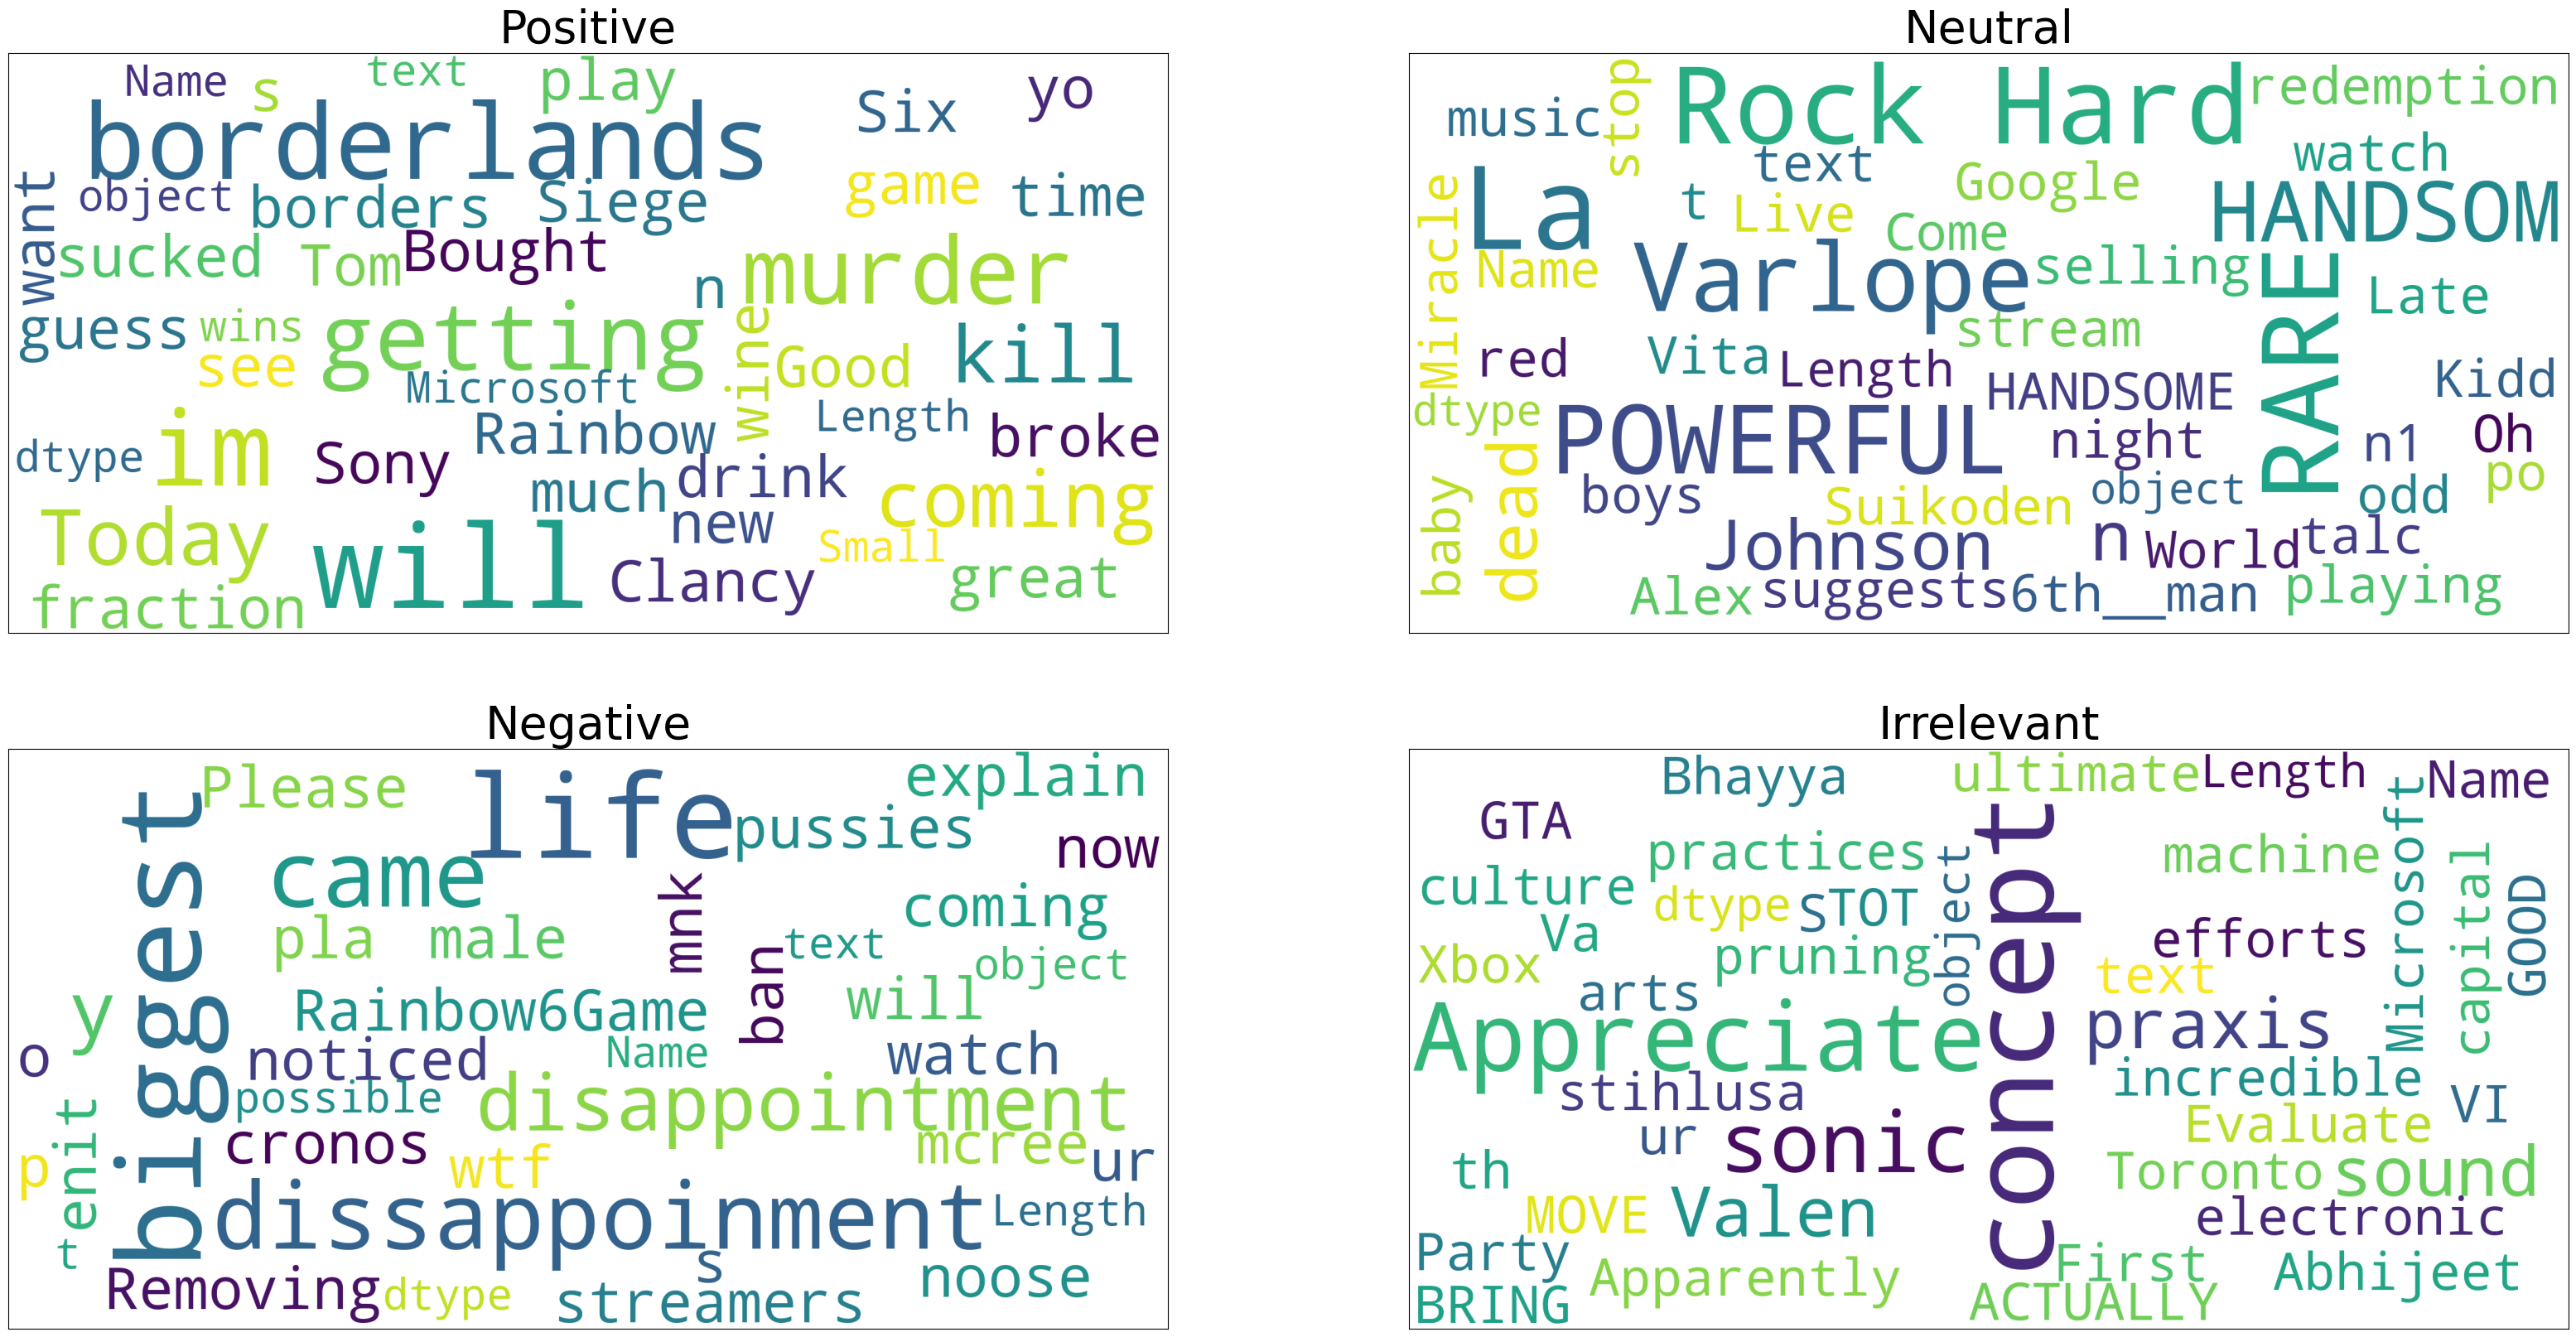

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot 2x2 grid word cloud for each sentiment
plt.figure(figsize=(40,20))

for index, col in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    # print(col)
    df1 = df[df['sentiment']==col]
    data = df1['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    # fig = plt.figure(figsize=(15,15))
    # plt.axis('off')
    # disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)

plt.show()
plt.tight_layout()


In [49]:
!pip install faker

import pandas as pd
from faker import Faker
import random

# Set seed for reproducibility
random.seed(42)

# Function to generate synthetic Azerbaijani sentences
def generate_sentences(num_sentences):
    fake = Faker('az_AZ')  # Azerbaijani locale
    Faker.seed(42)  # Set seed for reproducibility
    sentences = []

    for _ in range(num_sentences):
        sentence = fake.sentence()
        sentiment = random.choice(['Positive', 'Negative', 'Neutral'])
        sentences.append({'Text': sentence, 'Sentiment': sentiment})

    return sentences

# Generate 1000 synthetic sentences
num_sentences = 100
synthetic_data = generate_sentences(num_sentences)

# Create a DataFrame and save as CSV
df = pd.DataFrame(synthetic_data)
df.to_csv('azerbaijani_sentiment_data.csv', index=False)

# Display a sample of the generated data
print(df.head())




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.8 MB/s eta 0:00:00
                                           Text Sentiment
0                 Olmaq yoxdur bildirib heyvan.   Neutral
1  Dən port olmaq bildirib burada olmaq olacaq.  Positive
2           Port əlavə dəst bir ana etmək port.  Positive
3   Etmək harada oynamaq tərəfindən tərəfindən.   Neutral
4       Oxumaq özü yenidən yüksək sonra qoymaq.  Negative


In [50]:
import pandas as pd
from faker import Faker
import random

# Set seed for reproducibility
random.seed(42)

# Function to generate synthetic Azerbaijani tweets
def generate_tweets(num_tweets):
    fake = Faker('az_AZ')  # Azerbaijani locale
    Faker.seed(42)  # Set seed for reproducibility
    tweets = []

    for _ in range(num_tweets):
        user = fake.user_name()
        tweet = fake.text(max_nb_chars=random.randint(50, 280))  # Simulating tweet length
        sentiment = random.choice(['Positive', 'Negative', 'Neutral'])
        tweets.append({'User': user, 'Tweet': tweet, 'Sentiment': sentiment})

    return tweets

# Generate 100 synthetic tweets
num_tweets = 100
synthetic_tweets = generate_tweets(num_tweets)

# Create a DataFrame and save as CSV
df_tweets = pd.DataFrame(synthetic_tweets)
df_tweets.to_csv('azerbaijani_tweets_sentiment_data.csv', index=False)

# Display a sample of the generated tweets
print(df_tweets.head())


            User                                              Tweet Sentiment
0   eliogluimran  Digər tərəfindən heyvan belə soruşmaq. Olmaq b...  Positive
1       osman_41    Yüngül yüksək hər etmək yoxdur yer ev bildirib.   Neutral
2  tahir-talibli  Oxumaq almaq əlavə yoxdur hər izləmək demək. B...  Positive
3        zakir14  Əlavə yaşamaq yeni demək. Ana lazımdır isti ge...  Positive
4  makuludurdane  Özü cümlə yüksək bilərsiniz müstəqil yaşamaq o...  Positive


In [53]:
! pip install googletrans==4.0.0-rc1 transformers

from googletrans import Translator
from transformers import pipeline

def translate_to_english(text):
    translator = Translator()
    translation = translator.translate(text, src='az', dest='en')
    return translation.text

def analyze_sentiment(text):
    sentiment_analyzer = pipeline('sentiment-analysis')
    result = sentiment_analyzer(text)
    return result[0]['label'], result[0]['score']

def main():
    # Replace 'YOUR_AZERBAIJANI_TEXT' with your Azerbaijani text or article
    azerbaijani_text = 'bugün pisəm'

    # Translate to English
    english_text = translate_to_english(azerbaijani_text)

    # Analyze sentiment
    sentiment_label, sentiment_score = analyze_sentiment(english_text)

    print(f"Azerbaijani Text: {azerbaijani_text}")
    print(f"English Translation: {english_text}")
    print(f"Sentiment: {sentiment_label} (Score: {sentiment_score})")

if __name__ == "__main__":
    main()


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Azerbaijani Text: bugün pisəm
English Translation: I'm bad today
Sentiment: NEGATIVE (Score: 0.9997755885124207)


# 2. Algorithm - NLTK


NLTK (Natural Language Toolkit) is a powerful Python library for working with human language data, providing tools and resources for tasks such as tokenization, stemming, part-of-speech tagging, and sentiment analysis.








In [10]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Download the vader_lexicon resource
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

def analyze_emotion(text):
    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english') + list(string.punctuation))
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]

    # Load AFINN lexicon
    afinn = SentimentIntensityAnalyzer()

    # Calculate sentiment scores
    sentiment_score = afinn.polarity_scores(' '.join(filtered_words))

    # Determine emotion based on the sentiment score
    if sentiment_score['compound'] >= 0.05:
        emotion = 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        emotion = 'Negative'
    else:
        emotion = 'Neutral'

    return emotion

def main():
    # Get input text from the user
    user_text = input("Enter a sentence to analyze emotion: ")

    # Analyze emotion
    emotion = analyze_emotion(user_text)

    # Display the result
    print(f'The emotion of the text is: {emotion}')

if __name__ == "__main__":
    main()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Enter a sentence to analyze emotion: I feel sad
The emotion of the text is: Negative


# 3. NLTK Algorithmn - NAIVE BAYES

This code demonstrates training a Naive Bayes classifier on a dataset of positive and negative tweets and then using it to classify a new tweet. Note that this is a simplistic example, and for more robust emotion analysis, you may need a more extensive and domain-specific dataset.

In [11]:
import nltk
from nltk.corpus import twitter_samples
from nltk.tokenize import word_tokenize
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy

# Download NLTK resources
nltk.download('twitter_samples')
nltk.download('punkt')

# Load positive and negative tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

# Tokenize the tweets
positive_tokens = [word_tokenize(tweet) for tweet in positive_tweets]
negative_tokens = [word_tokenize(tweet) for tweet in negative_tweets]

# Create feature sets
positive_features = [(dict([(word, True) for word in tweet]), 'positive') for tweet in positive_tokens]
negative_features = [(dict([(word, True) for word in tweet]), 'negative') for tweet in negative_tokens]

# Split the data into training and testing sets
split = 0.8
positive_cutoff = int(len(positive_features) * split)
negative_cutoff = int(len(negative_features) * split)

train_features = positive_features[:positive_cutoff] + negative_features[:negative_cutoff]
test_features = positive_features[positive_cutoff:] + negative_features[negative_cutoff:]

# Train the Naive Bayes classifier
classifier = NaiveBayesClassifier.train(train_features)

# Test the classifier on the testing set
accuracy_score = accuracy(classifier, test_features)
print(f'Accuracy: {accuracy_score}')

# Example usage of the classifier
new_tweet = "I love this product, it's amazing!"
new_tokens = word_tokenize(new_tweet)
classification = classifier.classify(dict([(word, True) for word in new_tokens]))

print(f'Tweet: "{new_tweet}"')
print(f'Classification: {classification}')


[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.973
Tweet: "I love this product, it's amazing!"
Classification: positive


# 4.  Support Vector Machine Algorithmn (SVM)

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. It works by finding the optimal hyperplane that separates data into different classes while maximizing the margin between them, making it robust and effective in high-dimensional spaces.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Sample data (replace this with your actual data)
data = [
    ("I love this product", 1),
    ("Not satisfied with the service", 0),
    ("Amazing experience", 1),
    ("The quality is poor", 0),
    # Add more examples as needed
]

# Separate the data into features (X) and labels (y)
X = [text for text, label in data]
y = [label for text, label in data]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize SVM classifier
clf = SVC(kernel='linear')

# Train the classifier
clf.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred = clf.predict(X_test_tfidf)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.00
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.